In [1]:
# importing dependencies 
# json for extracting data from the Wikipedia data
# pandas to create DataFrames
# numpy for converting data types

import json
import pandas as pd
import numpy as np
import re

In [2]:
# import the Wikipedia JSON file

file_dir = '/Users/johncompton/Desktop/bootcamp/Modules/mod_8/Movies-ETL/'

f'{file_dir}wikipedia-movies.json'

'/Users/johncompton/Desktop/bootcamp/Modules/mod_8/Movies-ETL/wikipedia-movies.json'

# Extract the Wikipedia Movies JSON

## Finding the file

- Tempting to open the file directly using the read_json method that comes with Pandas. 
    - However, this method works best with data that has already been cleaned/prepared.
    - This sort of data is called "flat data"
- Data that will come as a JSON from Wikipedia will be pretty messy
    - best practice is to load raw JSON data as a list of dictionaries before converting to a DataFrame. 
    - If you immediately convert it to a DataFrame, it will just be a messy DataFrame.
    
## Load the JSON into a List of Dictionaries

- This will require using the load() method.
- Recall that you need to use a with statement to handle the file resources.
- See below for an example:

In [3]:
# using a with statement to open the file
# note how using the file_dir variable with a f string to get the file and setting the mode to "r" (read)
# then, using json.load() to convert the data to a list of dictionaries.

with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

# finding the number of records:
    
len(wiki_movies_raw)

7311

In [4]:
# Getting a sense of the data by taking a look at the first 5 records:

wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# Getting a sense of the data by taking a look at the last 5 records:

wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [6]:
# Taking a peek at some records in the middle:

wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [7]:
# now working with movielens data
# it is in flat format, so can read straight into a pandas DataFrame

kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)

ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [8]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [10]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
31913,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,241071,tt1877688,en,Brightest Star,A recent college graduate sets out to win back...,...,2014-01-31,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Brightest Star,False,4.5,11.0
39065,False,"{'id': 89188, 'name': 'Harry Palmer Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,37237,tt0113633,en,Bullet to Beijing,When long-time British agent Harry Palmer lose...,...,1995-12-20,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ipcress File's Harry Palmer is back.... an...,Bullet to Beijing,False,3.4,8.0
12525,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,46982,tt0056919,cs,Černý Petr,Reality movie of a few days in the life of a C...,...,1964-04-16,0.0,85.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Black Peter,False,7.3,10.0
9095,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,9956,tt0118768,en,The Brave,A down-on-his-luck American Indian recently re...,...,1997-07-30,0.0,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Brave,False,5.7,49.0
37100,False,"{'id': 256433, 'name': 'Dabangg Collection', '...",9370000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://dabanggthefilm.com/,44425,tt1620719,hi,Dabangg,Chulbul Pandey is a corrupt but golden-hearted...,...,2010-09-09,0.0,130.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Dabangg,False,5.9,49.0


In [11]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
16825319,174824,553,4.0,1130292869
2954319,30778,1747,3.5,1286187906
13181627,136981,3949,3.0,1488129824
13286612,138118,2710,2.0,1002581319
10678493,110220,1197,4.0,1415646127


In [12]:
ratings.count()

userId       26024289
movieId      26024289
rating       26024289
timestamp    26024289
dtype: int64

In [13]:
kaggle_metadata.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [14]:
ratings.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
26024284,False,False,False,False
26024285,False,False,False,False
26024286,False,False,False,False
26024287,False,False,False,False


In [15]:
kaggle_metadata.isnull()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
45462,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
45463,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45464,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# Data Cleaning Strategies

- Follow the basic process of:
    1. Inspect
    2. Plan 
    3. Execute
    
- Data Comes in 3 states:
    1. **Data Beyond Repair**: This can be data that has been overwritten or has suffered severe corruption during storage or transfer (i.e. power loss or spikes, hard drive failures, etc.)
        - Only thing to do is delete data beyond repair.
    2. **Badly Damaged Data**: Garbled data with missing values, data from inconsistent sources, existing in multiple columns. There will be trade-offs with selecting the best solution:
        - Filling in missing data:
            - substituting data from another source
            - interpolating between existing data points
            - extrapolating from existing data
        - Standardizing units of measure (i.e. monetary values stored in multiple currencies, etc.)
        - Consolidating data from multiple columns
    3. **Data in Wrong Form**: Should be easily fixed. Could be data that is too granular, numeric data stored as strings, or data that needs to be split into multiple columns (i.e. address data). To fix:
        - Reshape the data
        - Convert data types
        - Parse text data to the correct format
        - Split columns
        
- Note that it is always a good idea to document your assumptions, decisions, motivations, and process

- Cleaning data is an **iterative process**

## Iterative Process for Cleaning Data

- Early iterations of the Inspect, Plan, Execute process often focus on making the data easier to navigate:
    - removing obviously bad data, removing superflous columns (i.e. columns with only one value or missing overwhelming amounts of data), removing duplicate rows, consolidating columns, and reshaping data if necessary.
    - As obvious problems get solved, smaller more nuanced problems become more noticeable. 
    - The iterative nature means that as more subtle issues arise, we may see that we need to undo early steps in the process.
    
### Inspect the Data

- First need to see if the data was imported correctly.
    - print out the first few data points and look for irregularities (data in the wrong columns, all missing values, column headers that don't make sense, garbled characters)
    - The beginning could look fine, but then problems could arise in the middle of the dataset. 
        - Good to look at the first few rows and a random sample
    - Can begin process by asking a couple of quesitons:
        1. Does the data have a consistent structure (i.e. CSV table), or is it unstructured (i.e. a collection of email messages)?
        2. How is each data point identified -- is there an explicit unique ID for each data point, or will one need to be built?

- Most data has too many points to look at each row individually. Need strategies to tell about the whole dataset:
    1. Count how many data points or rows exist.
        - If data is unstructured, count the number of colums and missing values in each column. 
        - If possible, count number of unique values in each column. an dhow frequently each unique value appears
            - Need to determine the data types for each column to determine if this is possible.
            - Investigating the data type involves both finding out what the data type is *and* what it should be.
    2. If column data is numeric, can summarize the data with basisc statistics like measures of central tendency and measures of spread.
        - Can also investigate columns with statistical plots (scatter plots and histograms)

### Plan for Data Cleaning

- After identifying the problems, make decisions on how to fix the problem. This requires clearly articulating (and documenting) what the problems are and how to fix them.

- Answer several questions:
    1. If a column doesn't have the right data type, is it the whole column, or just a few rows?
    2. Do rows have outliers due to spurious data, or are they valid data points?
    3. When values are missing, will they need to be removed, replaced, or interpolated?
    
- Answering these questions help fill out the plan for cleaning the data.
    - There are 2 main ways to modify the data:
        1. modify the values
        2. modify the structure
        
- *Modifying the Values*
    - includes removing rows or columns, replacing values, or generating new columns from old ones.
    - Could remove rows because of missing or corrupted data, columns with only one values, or columns with mostly missing data.
    - May replace data by replacing empty values with 0s or empty strings
    - Can also replace data by putting them in a standard form (i.e. a column of percentages that has whole numbers and fractions - putting them in one form).
    - Converting a column to a new data type is another way to replace values
    - Can bin data by rounding to nearest hundred, replacing numeric data (i.e. income) to categorical data (i.e. income brackets).
    - Generate new columns by splitting an address into distinc columns or calculating new column from others.
- *Modifying the Structure*
    - pivoting values of one column into multiple columns
    - aggregating rows
    - merging datasets
    - aggregating large amounts of data into a summary data or summary statistics.

### Execute 

- Clearly stating the steps allows for informed deicision making and choosing wisely among the various trade-offs.

- As you write code to fix the issues, it could be come clear that the problem is more complex.
    - take account of new issues as they arise.
    
- After making some changes go back to the Inspect part of the iterative process.

**Data cleaning is a messy process**

**Always remmeber to document every step of your thought process and actions!!**

In [16]:
# inspecting the wikipeda movies data
# first convert it to a dataframe to get a peek

wiki_movies_df = pd.DataFrame(wiki_movies_raw)

wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# note that the head tells that there are 193 columns
# to get a sense of the columns, convert the columns to a list to see them:
# Note that there are manay columns that are not germane to the task at hand.

wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

# List Comprehensions to Filter Data

- List comprehensions are a compact way to apply a function to every element in a list.
    - can be used to compress code that would have been done for a for-loop:
        - `[expression for element in source_list]`
    - Can also filter out results using a condidtional filter expression:
        - `[expression for element in source_list if filter_expression]`
        - Here the resulting list will only have elements where the filter expression evaluates to True.
    
- Here, can filter for only movies that have a director and IMDb link
    - note that there are two columns with director information: "Director" or "Directed by"
        - need to check if eith are keys in the current dict
        - If there is a director listed, also want to check that the dict has an IMDb link
    - Code would look like this:
    
    `if ('Director' in move or 'Directed by' in movie) and 'imdb_link in movie`
    
- Creating a list comprehension with filter expression and save that to the intermediate variable `wiki_movies` and then see how many movies now exist using `len()`
        

In [18]:
# filtering using the list comprehension
wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie]


len(wiki_movies)

     

7080

In [19]:
wiki_clean_1 = pd.DataFrame(wiki_movies)

wiki_clean_1.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IMPORTANT NOTE

- Make sure that you make nondestructive edits when designing your pipeline

- This means keeping your raw data stored in one variable and your clean data stored in another. 

    - This will take up more memory, but it also means that you can track what you've done and always go back if errors arise.

In [20]:
# Now adding 'No. of episodes' to the list comprehension filter statement:


wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes' not in movie]

len(wiki_movies)

7076

In [21]:
# now creating a DataFrame from that:

wiki_clean_2 = pd.DataFrame(wiki_movies)

wiki_clean_2.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# creating a function to clean the data part 1
# writing a simple function to make a copy of the movie and return it (will add more to the block iteratively)

def clean_movie(movie):
    
    # movies are dicts, so make a copy of the movie to make nondestructive ediits
    # use the dict() constructor (special functions that initialize new objects)
    
    movie = dict(movie)
    # here initializing a local variable to make a non-destructive copy
    return movie

# looking at the Arabic languages:

wiki_clean_2[wiki_clean_2['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [23]:
# getting the URLs for the movies:

wiki_clean_2[wiki_clean_2['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [24]:
# this looks like the different languages are alternate titles for the movie.
# combining all of the alternate titles into one dictionary.
# go through the columns and determine which are alternate titles

sorted(wiki_clean_2.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [25]:
wiki_clean_2.value_counts('Mandarin')

Mandarin
Cháng Chéng          1
Dōng Gōng Xī Gōng    1
Xǐyàn                1
Yè Wèn Sān           1
dtype: int64

In [26]:
# working on the function to deal with the alternate titles
# Make an empty dict to hold the alternate titles
# loop through al list of all alternative title keys:
# check if current key exists in the movie object
# if so, remove the key-value pair and add to the alternative titles dict
# After looping, add the alternative titles dict to the movie object

def clean_movie(movie):
    
    movie = dict(movie) # create a non-destructive copy
    
    alt_titles = {}
    
    for key in ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French',
               'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Literally',
               'Mandarin', 'McCune-Reischauer', 'Original title', 'Polish',
               'Revised Romanization', 'Romanized', 'Russian',
               'Simplified', 'Traditional', 'Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
            
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie


# making a list of cleaned movies with list comprehension

clean_movies = [clean_movie(movie) for movie in wiki_movies]



In [27]:
wiki_movies_df = pd.DataFrame(clean_movies)

sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [28]:
# working on a nested function to consolidated the related "director" columns.
# This new function will go within the clean_movie() function
# Note that these nested functions cannot be called outside of the outer function

def clean_movie(movie):
    
    movie = dict(movie) # create a non-destructive copy
    
    alt_titles = {}
    
    for key in ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French',
               'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Literally',
               'Mandarin', 'McCune-Reischauer', 'Original title', 'Polish',
               'Revised Romanization', 'Romanized', 'Russian',
               'Simplified', 'Traditional', 'Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
            
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # Merge Column names
    
    def change_column_name(old_name, new_name):
        
        if old_name in movie:
            
            movie[new_name] = movie.pop(old_name)
            
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of Origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')


        
    return movie

clean_movies = [clean_movie(movie) for movie in wiki_movies]

wiki_movies_df = pd.DataFrame(clean_movies)

sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# Removing Duplicate Rows

- In this project, using IMDb ID to merge with the Kaggle data, so need to first extract the IMDb ID from the IMDb link
- This requires using/understanding regular expressions.

## Regular Expressions

- **regular expressions**: also known as *regex* are strings of characters that define a search pattern.

- You see regular expressions all the time in the non-coding world:
    - MM_DD_YYY for a date
    - (###)###-#### for a phone number in the U.S.
    
- Process for extracting the data using regular expressions:
    1. use the regular expressions in Pandas' built-in string methods that work on a Series object accessed with the `str` property
    2. Will be using the `str.extract()`: it takes in a regular expression pattern
        - IMDb link looks like this: "https://www.imdb.com/title/tt1234567/"
        - the tt1234567 is the IMDb ID
        - So the regular expression pattern is as follows:
            - begins with tt
            - and has seven digits
        - the `str.extract` would take the following:
            - `"(tt\d{7})"`
            - the () say "look for one group of text
            - the `tt` says to match the tt
            - the `\d` says to match a numerical digit
            - the `{7}` says to above parameter exactly 7 times.

- Because regular expressions use backslashes, which Python also uses for special characters, need to tell Python to treat regular expression characters as a raw string of text
    - to do so, put the `r` before the quotes 
    - this must be done each time you create a regular expression string
    
- For this project, we will put the IMDb ID into a new column

- The entire code will look like this:

`wiki_movies_df['imdb_id] = wiki_movies_df['imdb_link].str.extract(r'(tt\d{7}')`

## Executing the Code:

- Now you can drop the duplicates using the `drop_duplicates()` method. 
    - To specify what you want to consider, use the `subset` argument and set `inplace` equal to `True`
        - The `inplace` makes sure the operation is performed on the selected DataFrame
        - Without this, the operation would return an edited DataFrame that would need to be saved to a new variable.

- Then find the new number of rows and how many rows were dropped.

- The code should look like this:

In [29]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

print(len(wiki_movies_df))

wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)

print(len(wiki_movies_df))

wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


# Removing Mostly Null Columns

- Scraped data can have a lot of columns that are mostly null.

- One way to get a sense of how many columns have null values is to use a list comprehension with `isnull()` and `sum`
    - The code would look like the following: 
    
    `[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]`
    
- That code shows that there are around 6,000 null values
    - best to remove these programmatically to avoid errors. 
    - Want to make a list of columns that have less than 90% null values and use those to trim down the dataset.
    - Need to tweak the above list comprehension:
    
    `[column for column in wiki_movies_df.columns if wiki_movies_df[column]isnull().sum() < len(wiki_movies_df) * 0.9]`
    
- That code will return the columns you want to keep, and then select them from your Pandas DataFrame like so:

`wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies[column].isnull().sum() < len(wiki_movies_df) * 0.9]`

`wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]`

In [30]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


# Converting Data Types

- There may be columns that have the data we need but not in the correct data type
    - i.e. strings that should be integers or dates, etc.
    
- This will require using regular expressions again.
    - first use the `wiki_movies_df.dtypes` to display the data types. 
    - this will show the data type for each column.

- Begin this process by looking at the 'Box office' column
    - will first need to drop rows where box office data is not defined
    - will create a data series that drops missing values using this code:
    
    `box_office = wiki_movies_df['Box office'].dropna()`
    
    - Recall that it is always a good idea to check the number of data points after you have dropped any data.
    - Regular expressions **only work on strings** 
        - Therefore, need to check to make sure all of the box office data is in a string format.
        - Can use the `map()` function to see which values are not strings. 
        - Make a `is_not_a_string()` function:
        
        ` def is_not_a_string(x):
            return type(x) != str`
        - because we are only doing this once, a better way forward would be to make a lambda function:
        
        `lambda x: type(x) != str`
        
        
       

In [31]:
box_office = wiki_movies_df['Box office'].dropna()

len(box_office)

5485

In [32]:
# determining if box_office data is a string:

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [33]:
# the above output shows that there are many data points stored as lists. 
# join() string method concatenates list items into one string
# need to make a separator string and then call the join() method, here just using a simple space.
# another example of using an lambda function 

box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [34]:
box_office.sample(n=20)

3641     $15.1 million
6572      $6.3 million
5375     $10.1 million
1359        $3,983,912
4339    $196.4 million
5642      $183 million
235     $261.3 million
6293     $26.1 million
3463     US$14,339,171
2110          $334,319
1169      $5.5 million
1317       $40,070,995
4188       $26,809,273
3354       $44,350,926
4095          $499,620
1516        $2,084,559
5683       $83 million
4224    $110.8 million
3069       $18,591,272
6430     $98.3 million
Name: Box office, dtype: object

# Regular Expression Deep Dive

- **Regular Expressions** are strings of characters that are used as a search pattern
    - they are used for the following reasons:
        1. test if strings are in a specific format
        2. contain a substring in a specific format
        3. extract pertinent information from strings/discarding unnecessary information 
        4. perform complicated replacements of substrings.
    - Every character in a regular expression serves a purpose based on the kind of character it is.
    
## Literal Characters

- **Literal Characters**: simplest character class; regular expression made of literal characters will match any string that contains the expression as a substring.
    - i.e. if you had "cat" as your regular expression and searched strings like "placate" "tomcat" "catch", it would return all of those values because they all have cat in them. 
    - Note that character combinations that begin with a backslash (\) are treated as one character.
    
## Character Types: \d, \w, \s, (and \D, \W, \S)

- special characters and what they do:
    1. `\d`: match any digit 0 to 9
    2. `\D`: match any non-digit character
    3. `\w`: matches a word character (a letter, digit, or underscore)
    4. `\W`: matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
    5. `\s`: match any whitespace character (including spaces, tabs, and newlines)
    6. `\S` will match any non-whitespace characters

## Character Sets: [ ]
- If you need to be more specific beyond digits, alphanumeric characters, or whitespace characters use [] to define the character set
    - i.e. "[ceh]at" would match the following: "cat", "eat", "hat", and "that" but not "rat

- It is also possible to specify a range of characers inside a character set:
    1. `"[a-z]"`: matches any lowercase letter
    2. `"[A-Z]"`: matches any uppercase letter
    3. `"[0-9]"`: matches any alphanumeric character

- It is also possible to include multiple ranges:
    1. `"[a-zA-Z]"`: matches any uppercase or lowercase letter.
    2. `"[a-zA-z0-9]"`: matches any alphanumeric character
    
- You can also do smaller sets:
    1. `"[A-E]"`
    2. `"[1-3]"`
    
- You can also include character types within the set:
    - `"[a-zA-Z\d]"` would match any alphanumeric character as `"[a-zA-Z0-9]"`

- Prefacing the set with the `^` allows you to specify what character we **DO NOT** want to include.

## Match (Almost) Everything

- Using the `.` is a **wildcard** in regular expressions
    - match any single character whether it is a digit, letter, whitespace, or punctuation. 

- Note that it **WILL NOT** capture line breaks
    - In Python's regular expression module, there's an option to make the dot match every character, including line breaks.
    
## Escaping: \

- The dot and brackets are examples of **metacharacters**, they can match everything or create a character set.

- Can run into the issue if you are trying to match a period (.) and not communicate "match everything" with `.`
    - the backslash tells the parser to treat the upcoming metacharacter like a literal character 
        - "ca/." will match the . and not match everything
    
    

In [35]:
# building a regular expression to clean up the box office data
# for the ""$123.4 million" form, need to match the the following elements:
# dollar sign
# arbitrary but non-zero number of digits
# optional decimal point
# a space (and possibly more than one)
# the word "million" or "billion
# storing that regular expression into a variable
form_one = r'\$\d+\.?\d*\s*[mb]illion'

# to count how many box office values match first fomr, use str.contains()
# to ignore case, add the flags argument and set it equal to re.IGNORECASE.
# if the data is not a string, use na=False
# call the sum() method to count up the total number that return TRUE

box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [36]:
# to match the $123,456,789 form:
# need a dollar sign
# a group of one to three digits
# At lease one gorup starting with a comma followed by exactly three digits.

form_two = r'\$\d{1,3}(?:,\d{3})+'

box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [37]:
# Compare Values in Forms
# Need to check if any box office values are described by both forms
# make code easier to read by creating 2 Boolean Series 
# then select the box office values that don't match either

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)

matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [38]:
# to capture the values not rep in form 1 or two use Pandas element-wise logical operators 
# ~ is similar to 'not'
# & is 'and'
# | is 'or'

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [40]:
# fixing the pattern to capture more.

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'


form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

box_office = box_office.str.replace(r'\$.*[-–—](?![a-z])', '$', regex=True)

box_office.str.extract(f'({form_one}|{form_two})')


,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [41]:
# fixing the patterns to capture everything.
# some have spaces between the $ and the number - solved with \s*
# some values use a period as a thousands separator
    # solved with [,\.] but also need negative lookahead
# some values are given as a range
# "million" is misspelled as "millon"

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [42]:
# extract values from box_office using str.extract
# then use parse_dollars to first column in the DataFrame returned by str.extract

wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [43]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [44]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [45]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0


In [46]:
# now parsing the budget data

budget = wiki_movies_df['Budget'].dropna()

In [47]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)



In [48]:
budget = budget.str.replace(r'\$.*[-–—](?![a-z])', '$', regex=True)


In [49]:


matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)

matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)


budget[~matches_form_one & ~matches_form_two]


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [50]:
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [51]:
# parsing the budget data

wiki_movies_df['Budget'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)





In [52]:
# dropping the original 'Budget' column

wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [55]:
# Parse the Release Date
# first create a variable that holds the non-null values of Release date in the DataFrame. 
# Convert lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)



In [58]:
# forms we're trying to capture:
# January, 1, 2000
# 2000-01-01
# January 2000
# 2000

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'

date_form_two = r'\d{4}.[01]\d.[0123]\d'

date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

date_form_four = r'\d{4}'

# Extracting the dates

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [59]:
# Parsing the dates
# Using the Pandas to_datetime method instead of writing a new function.
# set infer_datetime_format to True because there are different date formats represented.

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
                                                
                                                
                                                
                                                

In [60]:
# Parsing the runtime 
# beginning by creating a variable that holds the non-null values of Running time in the DataFrame

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [61]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [65]:
# now get a sense of how many of the running_time values follow the "100 minutes" format

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [66]:
# checking to see what the remaining 366 entries look like:

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [67]:
# Now making it more general by only marking the beginning of the string, and accepting other abbreviations
# only searching up to the letter 'm'

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [69]:
# now checking to see what the remaining 17 are

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [70]:
# matching the hour + minute patter with a regular expression
# start with 1 or more digits
# have optional space after the digit and before the letter h
# Capture all the possible abb for hour(s) by making ever letterin in hours optional except h
# have optional space after hours marker
# have optional number of digits for minutes

# Pattern looks like this: "d+\s*ho?u?r?s?\s*\d*"
# only want to extract digits and allow for both possible patters
# Capture groups around the \d instances and add an alternating character

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')


In [73]:
# this new DataFrame is all strings - need to convert to numeric values
# may have captured empty strings, so use to_numeric() and set errors arg to 'coerce'
# Coercing errors will turn empty strings into NaN
# use fillna() to change NaNs to zeros

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [76]:
# now apply a funciton that will convert the hour capture groups and minute capture groups to minutes
# if tthe pure minutes capture group is zero, and save output to wiki_movies_df

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,1990-12-19,95.0


In [77]:
# Dropping the "Running time" from the DataFrame

wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [78]:
# checking to see the data types of the kaggle data

kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [82]:
# Checking to see if adult values are true or false

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [83]:
# Removing the bad data

kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Keeping only films where adult column is false, and then dropping the adult column

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [85]:
# now inspecting the video column

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [86]:
# Converting the data types
# The following code creates a Boolean column and assigns it back to the video column

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

kaggle_metadata['video'].dtypes

dtype('bool')

In [87]:
# for the numeric columns, just need to use the Pandas method to_numeric()
# make sure errors arg is set to 'raise' to show if any data can't be converted

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)

kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')

kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [88]:
# converting release_date to datetime using Pandas to_datetime

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [89]:
# now inspecting the ratings data using the info() method and setting null_counts to true

ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


/var/folders/k7/19_mb4p14klc3tt8qs0nq92r0000gn/T/ipykernel_70058/3748363780.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


In [91]:
# need to store the timestamp column as a datetime data type because storing  the rating data table in SQL

pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [92]:
# output looks reasonable, so assigning it to the timestamp column

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

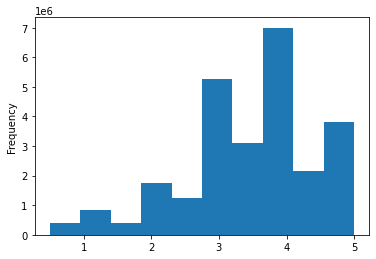

In [93]:
# now looking at the statistics of the ratings to see if there are obvious errors
# using the describe() method 

pd.options.display.float_format = '{:20,.2f}'.format

ratings['rating'].plot(kind='hist')

ratings['rating'].describe()